In [7]:
#imports
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
from stl import mesh

from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
%matplotlib notebook

dataset_random_seed = 0
dataset_size = 50

In [2]:
#generate 2D rectangles - dataset 1
np.random.seed(dataset_random_seed)

def random_rectangle(min_scale, max_scale):
    scale = np.random.rand()*(max_scale-min_scale)+min_scale
    width, height = np.random.rand(2)*scale
    return np.round([0, 0, 0, width, height, width, height, 0],5)

rectanges = list()
for i in range(0,dataset_size):
    rectanges.append(random_rectangle(1,10))
    
with open('dataset_1.csv', mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for i in range(0,dataset_size):
        csv_writer.writerow(rectanges[i])

In [19]:
#generate 2D convex polygons - dataset 2
np.random.seed(dataset_random_seed)

def random_polygon_convex(min_scale, max_scale, min_vertices, max_vertices):
    n_vertices = np.random.randint(min_vertices,max_vertices)
    scale = np.random.rand()*(max_scale-min_scale)+min_scale
    points = np.random.rand(n_vertices, 2)*scale
    hull = ConvexHull(points)

    vertices = points[hull.vertices,:]
    return np.round(vertices,5)

convex_polygons = list()
for i in range(0,dataset_size):
    convex_polygons.append(random_polygon_convex(1,10,3,12))
    
with open('dataset_2.csv', mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for i in range(0,dataset_size):
        csv_writer.writerow(convex_polygons[i].flatten())

In [23]:
#generate 2D non-convex polygons - dataset 3
#np.random.seed(dataset_random_seed)

def ccw(Ax,Bx,Cx,Ay,By,Cy):
    return (Cy-Ay) * (Bx-Ax) > (By-Ay) * (Cx-Ax)

# Return true if line segments AB and CD intersect
def intersect(Ax,Bx,Cx,Dx, Ay,By,Cy,Dy):
    return ccw(Ax,Cx,Dx,Ay,Cy,Dy) != ccw(Bx,Cx,Dx,By,Cy,Dy) and ccw(Ax,Bx,Cx,Ay,By,Cy) != ccw(Ax,Bx,Dx,Ay,By,Dy)

def count_intersections(vertices):
    n_vertices = vertices.shape[0]
    M=np.zeros((n_vertices,n_vertices))
    vertices = np.vstack((vertices,vertices[0,:]))
    for x in range(0,n_vertices):
        for y in range(x+2,n_vertices):
            M[x,y] = intersect(vertices[x,0],vertices[x+1,0],vertices[y,0],vertices[y+1,0],vertices[x,1],vertices[x+1,1],vertices[y,1],vertices[y+1,1])
    vertices = vertices[0:-1,:]
    return np.sum(M)

def generate_concave_polygon(n_vertices=8):#because of the random part, this is impractical for n_vertices>10
    vertices = np.random.random((n_vertices,2))
    while count_intersections(vertices)>0:
        np.random.shuffle(vertices)
    return vertices

def random_polygon_concave(min_scale, max_scale, min_vertices, max_vertices):
    n_vertices = np.random.randint(min_vertices,max_vertices)
    scale = np.random.rand()*(max_scale-min_scale)+min_scale

    vertices = generate_concave_polygon(n_vertices)*scale
    return np.round(vertices,5)

concave_polygons = list()
for i in range(0,dataset_size):
    concave_polygons.append(random_polygon_concave(1,10,5,10))
    
with open('dataset_3.csv', mode='w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    for i in range(0,dataset_size):
        csv_writer.writerow(concave_polygons[i].flatten())

In [24]:
#dataset 4 is the union of datasets 1, 2, and 3
filenames = ['dataset_1.csv', 'dataset_2.csv', 'dataset_3.csv']
with open('dataset_4.csv', 'w') as outfile:
    for fname in filenames:
        with open(fname) as infile:
            outfile.write(infile.read())

<IPython.core.display.Javascript object>


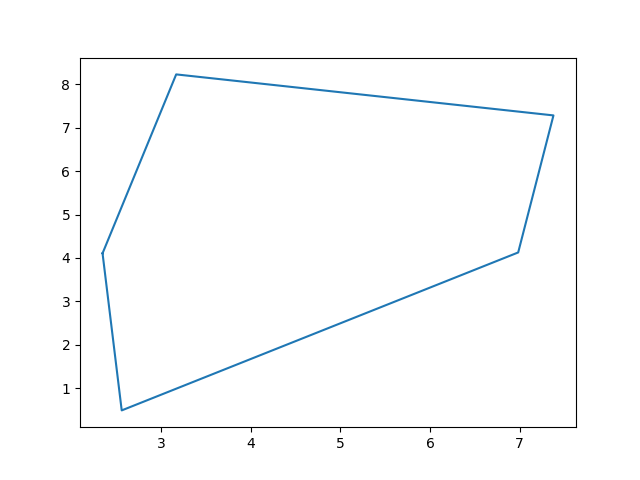

In [5]:
vertices = convex_polygons[0]
disp_vertices = np.vstack((vertices,vertices[0,:]))
plt.plot(disp_vertices[:,0],disp_vertices[:,1])
plt.show()

In [ ]:
#generate 3D cuboids - dataset 5

In [ ]:
#generate 3D convex polytopes - dataset 6

In [ ]:
#generate 3D non-convex polytopes - dataset 7

In [ ]:
#dataset 8 is the union of datasets 5, 6, and 7